<a href="https://colab.research.google.com/github/anas1IA-art/Custom_data/blob/main/Custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the data

In [1]:
import requests
import zipfile
from pathlib import Path

In [2]:
# Step 1: Download the specific gzip files
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz


--2024-09-01 10:52:41--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz [following]
--2024-09-01 10:52:42--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [application/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M   103MB/s    in 0.

In [3]:
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz

--2024-09-01 10:52:48--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz [following]
--2024-09-01 10:52:48--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515 (29K) [application/octet-stream]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.82K  --.-KB/s    in 0s   

In [4]:
# Step 2: Extract the gzip files
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz

In [5]:
import os
import numpy as np
from PIL import Image

In [6]:
# Define the directory structure
base_dir = 'fashion_mnist_dataset'

if os.path.isdir(base_dir):
    print(f"{base_dir} directory exists.")
else:
    print(f"Did not find {base_dir} directory, creating one...")
    os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
classes = ['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


Did not find fashion_mnist_dataset directory, creating one...


In [7]:
# Create the directory structure
for d in [train_dir, test_dir]:
    os.makedirs(d, exist_ok=True)
    for c in classes:
        os.makedirs(os.path.join(d, c), exist_ok=True)

In [8]:
# Paths to the extracted files
train_images_path = 'train-images-idx3-ubyte'
train_labels_path = 'train-labels-idx1-ubyte'
test_images_path = 't10k-images-idx3-ubyte'
test_labels_path = 't10k-labels-idx1-ubyte'

In [9]:
# Helper function to load MNIST data
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>u4')[0]
        num = np.frombuffer(f.read(4), dtype='>u4')[0]
        rows = np.frombuffer(f.read(4), dtype='>u4')[0]
        cols = np.frombuffer(f.read(4), dtype='>u4')[0]
        print(f"Magic number: {magic}, Number of images: {num}, Rows: {rows}, Columns: {cols}")
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
    return images

In [10]:
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>u4')[0]
        num = np.frombuffer(f.read(4), dtype='>u4')[0]
        print(f"Magic number: {magic}, Number of labels: {num}")
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [11]:
def save_images(images, labels, base_dir,new_size=(56, 56)):
    for idx, (image, label) in enumerate(zip(images, labels)):
        class_name = classes[label]
        image_dir = os.path.join(base_dir, class_name)
        image_path = os.path.join(image_dir, f'image_{idx:04d}.jpeg')
        image = Image.fromarray(image)
        image = image.resize(new_size, Image.ANTIALIAS)
        image.save(image_path)

In [12]:
# Load and save training images
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
save_images(train_images, train_labels, train_dir,new_size=(28,28))

Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 60000


<ipython-input-11-81941a92c02b>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_size, Image.ANTIALIAS)


In [13]:
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)
save_images(test_images, test_labels, test_dir,new_size=(28,28))

Magic number: 2051, Number of images: 10000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 10000


<ipython-input-11-81941a92c02b>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_size, Image.ANTIALIAS)


In [14]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [15]:
walk_through_dir("./fashion_mnist_dataset")

There are 2 directories and 0 images in './fashion_mnist_dataset'.
There are 10 directories and 0 images in './fashion_mnist_dataset/test'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/sneaker'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/coat'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/shirt'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/bag'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/trouser'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/sandal'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/pullover'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/tshirt_top'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/dress'.
There are 0 directories and 1000 images in './fashion_mnist_dataset/test/ankle_boot'.
There are 10 directories and 0 imag

In [16]:
import random
from pathlib import Path
from PIL import Image

In [17]:
random.seed(42)
base_dir = Path('./fashion_mnist_dataset')

list_images = list(base_dir.glob("*/*/*.jpeg"))

In [18]:
image_path = random.choice(list_images)

In [19]:
image_path

PosixPath('fashion_mnist_dataset/train/sneaker/image_3431.jpeg')

In [20]:
image_class = image_path.parent.stem

In [21]:
image = Image.open(image_path)

In [22]:
print(f'path of image is : {image_path}')
print(f' Image class is : {image_class} ')
print(f'Image height is :{image.height}')
print(f'Image with is : {image.width}')



path of image is : fashion_mnist_dataset/train/sneaker/image_3431.jpeg
 Image class is : sneaker 
Image height is :28
Image with is : 28


In [46]:
image

We can do the same with **matplotlib.pyplot.imshow()**, except we have to convert the image to a NumPy array first.

In [24]:
import matplotlib.pyplot as plt
import numpy as np


In [25]:
from numpy import asarray

In [26]:
numpydata = asarray(image)

In [50]:
numpydata

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8,   0,  16,   0,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  10,   0,  12,   0,   0,   6,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8,   0,   2,   0,   6,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,  18,   0,  10,   1,   0,   9,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   3,   9,   0,   3,   8,   0,   6,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  13,   2,   0,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  14,   0, 179,  29,   6,  11,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   6, 168, 210, 206,   0,   2,   9,   0,   0,   0,
          0,   0],
       [  0,   2,   3,   0,   0,   5,   4,   0,   0,   0,   4,   0,   0,
          0,   5, 102, 165, 197, 159, 178, 127,   0,   0,   0,   0,  26,
          2,   0],
       [  6,   6,   5,   3,   1,   0,   0,   0,   5,   1,   0,   0,  13,
          0,  86, 200, 180, 166, 189, 219, 208, 215, 224, 182, 143, 198,
        128,   8],
       [  0,   0,   0,   2,   3,   0,   0,   4,   0,   0,   0,   1,   1,
         13, 172, 172, 179, 215, 183, 200, 229, 220, 228, 202, 187, 216,
         90,   0],
       [  2,   2,   2,   1,   1,   0,   0,   0,   9,   0,   8,   0,   0,
        118, 226,  84,   6,  59, 224, 209, 170, 230, 210, 212, 189, 198,
         33,   2],
       [  0,   0,   0,   0,   0,   2,   2,   0,   0,   7,   0,  18, 171,
        208, 156, 255, 176,   0,   0,  94, 186, 237, 193, 186, 195, 238,
         99,   3],
       [  6,  10,  10,   6,   5,   7,   6,   2,  10,   5,   0, 184, 228,
        127, 183, 157, 228, 249, 174, 206, 229, 190, 218, 188, 193, 228,
        168,   0],
       [  0,   0,   0,   3,   4,   0,   0,   5,   2,  55, 202, 211, 165,
        194, 225, 206, 181, 164, 216, 237, 208, 205, 204, 193, 219, 209,
        203,   0],
       [  8,   0,  15,  69,  99, 100, 120, 157, 164, 188, 177, 120, 200,
        224, 227, 236, 227, 200, 199, 192, 208, 199, 163, 204, 218, 206,
        214,   0],
       [  0,  74, 144, 187, 172, 167, 190, 168, 182, 170, 180, 214, 236,
        231, 225, 229, 209, 255, 181, 197, 234, 179, 191, 223, 205, 198,
        253,  13],
       [ 57, 173, 152, 152, 191, 186, 138, 157, 187, 172, 166, 174, 176,
        171, 173, 183, 179, 185, 174, 204, 197, 193, 241, 216, 213, 204,
        195,  59],
       [ 81, 192, 178, 166, 164, 191, 173, 198, 183, 191, 206, 219, 222,
        218, 218, 221, 225, 209, 225, 232, 189, 205, 242, 188, 173, 191,
        199,  96],
       [ 28, 152, 195, 195, 190, 190, 169, 189, 186, 193, 196, 192, 189,
        192, 199, 203, 201, 205, 210, 192, 179, 189, 186, 171, 199, 183,
        200,  40],
       [  0,  29, 148, 203, 202, 218, 242, 190, 198, 205, 209, 207, 210,
        217, 221, 219, 220, 230, 229, 214, 229, 233, 216, 238, 209, 209,
        196,  20],
       [  0,   0,   1,   0,  65,  92, 136, 184, 178, 182, 183, 179, 169,
        155, 136, 121, 118, 105, 111, 112, 108, 109, 109, 120, 133, 132,
         48,   7],
       [  5,   0,  17,   0,  10,   0,   0,   0,  11,   5,   0,   0,   0,
          0,   0,   6,   1,   0,   0,   6,   0,   0,  12,  10,   0,  20,
          0,   2],
       [  6,   0,   4,   0,   0,   9,   0,  10,   0,   0,   0,   4,   2,
          0,   0,   4,   0,  14,   0,   0,   5,   0,   0,   0,   0,   1,
          6,   0],
       [  0,   0,   0,   0,   0,   0,   

In [28]:
np_img = np.array(image)

In [29]:
np_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8,   0,  16,   0,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  10,   0,  12,   0,   0,   6,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8,   0,   2,   0,   6,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,  18,   0,  10,   1,   0,   9,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   3,   9,   0,   3,   8,   0,   6,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  13,   2,   0,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  14,   0, 179,  29,   6,  11,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   6, 168, 210, 206,   0,   2,   9,   0,   0,   0,
          0,   0],
       [  0,   2,   3,   0,   0,   5,   4,   0,   0,   0,   4,   0,   0,
          0,   5, 102, 165, 197, 159, 178, 127,   0,   0,   0,   0,  26,
          2,   0],
       [  6,   6,   5,   3,   1,   0,   0,   0,   5,   1,   0,   0,  13,
          0,  86, 200, 180, 166, 189, 219, 208, 215, 224, 182, 143, 198,
        128,   8],
       [  0,   0,   0,   2,   3,   0,   0,   4,   0,   0,   0,   1,   1,
         13, 172, 172, 179, 215, 183, 200, 229, 220, 228, 202, 187, 216,
         90,   0],
       [  2,   2,   2,   1,   1,   0,   0,   0,   9,   0,   8,   0,   0,
        118, 226,  84,   6,  59, 224, 209, 170, 230, 210, 212, 189, 198,
         33,   2],
       [  0,   0,   0,   0,   0,   2,   2,   0,   0,   7,   0,  18, 171,
        208, 156, 255, 176,   0,   0,  94, 186, 237, 193, 186, 195, 238,
         99,   3],
       [  6,  10,  10,   6,   5,   7,   6,   2,  10,   5,   0, 184, 228,
        127, 183, 157, 228, 249, 174, 206, 229, 190, 218, 188, 193, 228,
        168,   0],
       [  0,   0,   0,   3,   4,   0,   0,   5,   2,  55, 202, 211, 165,
        194, 225, 206, 181, 164, 216, 237, 208, 205, 204, 193, 219, 209,
        203,   0],
       [  8,   0,  15,  69,  99, 100, 120, 157, 164, 188, 177, 120, 200,
        224, 227, 236, 227, 200, 199, 192, 208, 199, 163, 204, 218, 206,
        214,   0],
       [  0,  74, 144, 187, 172, 167, 190, 168, 182, 170, 180, 214, 236,
        231, 225, 229, 209, 255, 181, 197, 234, 179, 191, 223, 205, 198,
        253,  13],
       [ 57, 173, 152, 152, 191, 186, 138, 157, 187, 172, 166, 174, 176,
        171, 173, 183, 179, 185, 174, 204, 197, 193, 241, 216, 213, 204,
        195,  59],
       [ 81, 192, 178, 166, 164, 191, 173, 198, 183, 191, 206, 219, 222,
        218, 218, 221, 225, 209, 225, 232, 189, 205, 242, 188, 173, 191,
        199,  96],
       [ 28, 152, 195, 195, 190, 190, 169, 189, 186, 193, 196, 192, 189,
        192, 199, 203, 201, 205, 210, 192, 179, 189, 186, 171, 199, 183,
        200,  40],
       [  0,  29, 148, 203, 202, 218, 242, 190, 198, 205, 209, 207, 210,
        217, 221, 219, 220, 230, 229, 214, 229, 233, 216, 238, 209, 209,
        196,  20],
       [  0,   0,   1,   0,  65,  92, 136, 184, 178, 182, 183, 179, 169,
        155, 136, 121, 118, 105, 111, 112, 108, 109, 109, 120, 133, 132,
         48,   7],
       [  5,   0,  17,   0,  10,   0,   0,   0,  11,   5,   0,   0,   0,
          0,   0,   6,   1,   0,   0,   6,   0,   0,  12,  10,   0,  20,
          0,   2],
       [  6,   0,   4,   0,   0,   9,   0,  10,   0,   0,   0,   4,   2,
          0,   0,   4,   0,  14,   0,   0,   5,   0,   0,   0,   0,   1,
          6,   0],
       [  0,   0,   0,   0,   0,   0,   

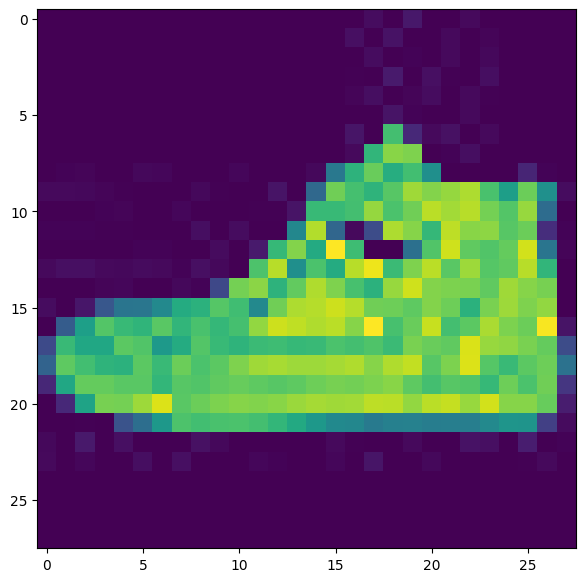

In [30]:
plt.figure(figsize=(10, 7))
plt.imshow(np_img)

## Transforming data

In [31]:
import torch
from torchvision import datasets ,transforms

Transform the data using **torchvision.datasets** for loading our dataset and **torchvision.transform** for preparing our data

I 'm going to build a  to create a custom Dataste to replacite ImageFolder
let's break  down

1 : create subclass  of *torch.utils.data.Dataset*

2 : as intialize our subclass with *targ_dir paremater* (the trajectoire of our data directory )  and  *transform* ( so we have the option of transform our data  if we  needed )

3:  create several attributes  like *paths* (paths for images )  and *trabsform* (the transform we can use it if we like but if not we can intialize it as  None )  class_names and classses _to_index ( we can create a function that return classes_names and classes_to_index we named as *find_classes()*)

4 : create a function  to load images from file and returm them

5 : overwrite the function __len__ method  of torch.utile.data.dataset that return the number of samples that exist  in the Dataset ,this is recommended but is not required

6 :  overwrite the fucntion __getitem__ method  of torch.utile.dataset to return  a single sample from dataset , this is required

Lest 's code that

In [32]:
from torch.utils.data import Dataset

from typing import List ,Tuple ,Dict

In [33]:
def  find_class (directory :str )-> Tuple[List[str],Dict[str ,int]]:

  classes  = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir() or entry.is_file())

  classes_to_index = {cols_name:i for i , cols_name in enumerate(classes)}

  return classes ,classes_to_index

In [34]:
find_class(test_dir)

(['ankle_boot',
  'bag',
  'coat',
  'dress',
  'pullover',
  'sandal',
  'shirt',
  'sneaker',
  'trouser',
  'tshirt_top'],
 {'ankle_boot': 0,
  'bag': 1,
  'coat': 2,
  'dress': 3,
  'pullover': 4,
  'sandal': 5,
  'shirt': 6,
  'sneaker': 7,
  'trouser': 8,
  'tshirt_top': 9})

In [35]:
 l = list(base_dir.glob("*/*/*.jpeg"))
 l[5].parent.name

'sneaker'

In [36]:
# import torch
# from PIL import Image
# from torchvision import transforms

# def transform_to_tensor(image: Image.Image) -> torch.Tensor:
#     transform = transforms.Compose([
#         transforms.Resize((28, 28)),  # Pass a tuple here
#         transforms.ToTensor(),
#         transforms.RandomVerticalFlip(p=0.5)
#     ])

#     return transform(image)


In [110]:
 def transform_ToTenser(image: Image.Image) ->torch.Tensor:
  transform = transforms.Compose([transforms.Resize((64,64)),
                                  transforms.ToTensor(),
                                  transforms.RandomVerticalFlip(p = 0.5)])

  return transform(image)





In [114]:
transform_ToTenser(image)[0][20]

tensor([0.0118, 0.0118, 0.0118, 0.0157, 0.0157, 0.0157, 0.0118, 0.0078, 0.0039,
        0.0039, 0.0000, 0.0078, 0.0118, 0.0118, 0.0078, 0.0078, 0.0039, 0.0000,
        0.0039, 0.0078, 0.0039, 0.0000, 0.0039, 0.0078, 0.0078, 0.0039, 0.0000,
        0.0118, 0.0235, 0.0157, 0.0039, 0.0471, 0.1216, 0.2314, 0.4157, 0.5843,
        0.6275, 0.6667, 0.6902, 0.7059, 0.7098, 0.6902, 0.6902, 0.7294, 0.7686,
        0.7216, 0.6667, 0.5765, 0.4667, 0.3961, 0.4039, 0.4118, 0.3765, 0.3412,
        0.3098, 0.2784, 0.2980, 0.3647, 0.4000, 0.3216, 0.2471, 0.1490, 0.0510,
        0.0157])

In [72]:
img3 = Image.open(l[200])
img3.size

(28, 28)

In [109]:
imagf = np.asarray(img3)
imagf.shape

(28, 28)

In [87]:
imgnumpy = transforms.ToPILImage(np.asarray(img3))
imgnumpy

ToPILImage(mode=[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6   0   7   7   

In [107]:
imgPil = transforms.ToPILImage(t)
imgPil.mode[0][20]

tensor([0.0588, 0.0745, 0.1176, 0.1608, 0.2078, 0.2510, 0.2784, 0.2980, 0.3098,
        0.3137, 0.3137, 0.3176, 0.3216, 0.3255, 0.3294, 0.3255, 0.3255, 0.3255,
        0.3294, 0.3373, 0.3529, 0.3686, 0.3608, 0.3451, 0.3373, 0.3333, 0.3333,
        0.3569, 0.3765, 0.3725, 0.3686, 0.3608, 0.3529, 0.3490, 0.3647, 0.3804,
        0.3804, 0.3765, 0.3765, 0.3765, 0.3843, 0.3882, 0.3922, 0.4000, 0.4078,
        0.4118, 0.4157, 0.4157, 0.4157, 0.4118, 0.4078, 0.4039, 0.3961, 0.3922,
        0.3804, 0.3686, 0.3490, 0.3176, 0.2980, 0.3059, 0.3176, 0.2275, 0.1333,
        0.0980])

In [85]:
t = transfom_ToTenser( Image.open( l[20]))
t.shape, t

(torch.Size([1, 64, 64]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]))

In [39]:
import torch
import os
import pathlib
import torch


In [40]:
len(list(pathlib.Path('fashion_mnist_dataset').glob('*/*/*.jpeg')))

70000

In [190]:
# from typing_extensions import

class DatasetImageFolder(Dataset):

  def __init__(self, targ_dir: str , transform = None ):

      # super().__init__()
      self.targ_dir =  targ_dir
      self.transform = transform
      self.paths =list(pathlib.Path(targ_dir).glob('*/*.jpeg'))
      self.classes , self.classes_to_index = find_class(targ_dir)

  # create a function to load image,s from file and returm them
  def load_images(self, idex: int  )->Image.Image:

    image = self.paths[idex]

    return Image.open(image)
  #overwrite the function len method of torch.utile.data.dataset that return the number of samples that exist in the Dataset ,this is recommended but is not required
  def __len__(self)->int:

    return len(self.paths)


  def __getitem__(self, index)-> Tuple[torch.Tensor, int]:

    image = self.load_images(idex=index)  # This should return a PIL.Image
    class_name = self.paths[index].parent.name
    class_index = self.classes_to_index[class_name]

    if self.transform:
        image = self.transform(image)  # Transform the PIL.Image to a torch.Tensor
    return image, class_index


In [191]:


instance  = DatasetImageFolder(targ_dir = train_dir ,transform =   transform_ToTenser)

In [192]:

len(instance)

60000

In [193]:
instance.classes_to_index

{'ankle_boot': 0,
 'bag': 1,
 'coat': 2,
 'dress': 3,
 'pullover': 4,
 'sandal': 5,
 'shirt': 6,
 'sneaker': 7,
 'trouser': 8,
 'tshirt_top': 9}

In [194]:
instance.load_images(0)

In [195]:
type(list(pathlib.Path(train_dir).glob('*/*.jpeg'))[0])

pathlib.PosixPath

In [196]:
Image.open(list(pathlib.Path(train_dir).glob('*/*.jpeg'))[0])

In [200]:
image , label = instance[0][0], instance[0][1]
image,label

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 7)

In [203]:
image[0][20]

tensor([0.0157, 0.0510, 0.1529, 0.2510, 0.3176, 0.3882, 0.4824, 0.5804, 0.6588,
        0.7216, 0.7725, 0.7804, 0.7922, 0.7961, 0.8000, 0.7961, 0.7843, 0.7725,
        0.7647, 0.7569, 0.7686, 0.7725, 0.7882, 0.8000, 0.8000, 0.7804, 0.7647,
        0.7882, 0.8078, 0.8118, 0.8118, 0.8157, 0.8275, 0.8235, 0.8039, 0.7843,
        0.8078, 0.8275, 0.8471, 0.8706, 0.8706, 0.8510, 0.8314, 0.8157, 0.7961,
        0.8118, 0.8275, 0.8235, 0.8118, 0.8000, 0.7843, 0.7725, 0.8000, 0.8235,
        0.8314, 0.8353, 0.8275, 0.8118, 0.8078, 0.8510, 0.8902, 0.6118, 0.3098,
        0.2000])